## Closing Price Prediction of  BEXIMCO Pharma by ARIMA

# Import Libraries


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error

# Read Data

##### Our dataset contains 4 variables called Open, High, low and Close.
#### Which represents Opening price, Highest and lowest price and closing price of the day respectively

In [3]:
dataset = pd.read_csv('Beximco1.csv', index_col='Date', parse_dates=['Date']) 
del dataset['Volume']
dataset.head(10)

,Open,High,Low,Close
Date,,,,
2010-01-03,75.499933,78.241781,75.499933,77.672719
2010-01-04,78.552179,78.552179,76.482860,77.000190
2010-01-05,77.517520,79.121242,76.689792,78.603912
2010-01-06,78.862577,80.621499,78.707378,80.104169
2010-01-07,80.673232,80.673232,79.328174,79.638572
2010-01-10,80.621499,81.190562,79.638572,80.983630
2010-01-11,81.190562,81.190562,78.914310,79.535106
2010-01-12,79.224708,79.638572,78.810844,79.121242
2010-01-13,79.121242,80.414567,76.844991,77.414054


# Exploratory Data Analysis

## Scatter Matrix


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f25ba20>,
      dtype=object)

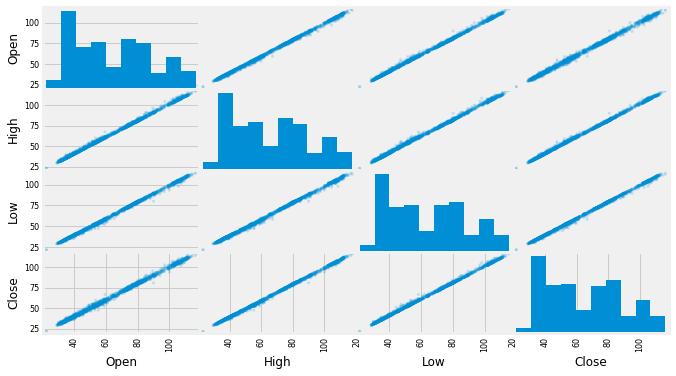

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.2, figsize=(10, 6), diagonal='hist')

### Heatmaps

In [5]:
corr = dataset.corr()  #Calculating correlation of dataset
corr

,Open,High,Low,Close
Open,1.000000,0.999213,0.999167,0.998436
High,0.999213,1.000000,0.999026,0.999364
Low,0.999167,0.999026,1.000000,0.999342
Close,0.998436,0.999364,0.999342,1.000000


## Comments
#### Scatter Plot and correlation matrix show us Open,High,Low variables are highly correlated with our target variable price(closing Price)

## Cheacking Outliers in Dataset

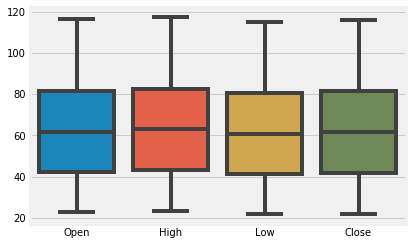

In [7]:
import seaborn as sns
sns.boxplot(data=dataset)

#### we have no outliers in our dataset

### Data Preparation

#### We split our dataset into training set for training our model and test data for validation of our model

In [8]:
training_set = dataset['2014':'2017'].iloc[:,0:4] #2014-2018 is our training data
training_set.tail(3)

,Open,High,Low,Close
Date,,,,
2017-12-26,101.15,101.75,99.85,101.45
2017-12-27,100.95,101.75,99.25,101.05
2017-12-28,100.65,104.05,100.55,102.55


In [9]:
test_set = dataset['2018':].iloc[:,3:4] #Closing Price of 2018 is our test data (target  variable is Closing Price)
test_set.tail(3)

,Close
Date,
2018-12-26,77.6
2018-12-27,79.1
2019-01-01,82.0


### Ploting Closing Price

/Users/san/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


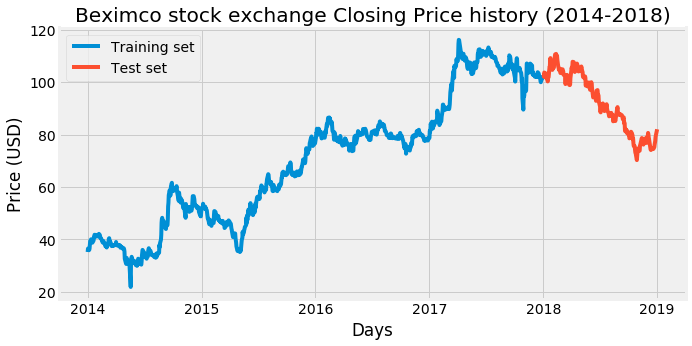

In [14]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')

plt.plot(training_set["Close"])
plt.plot(test_set["Close"])

plt.title('Beximco stock exchange Closing Price history (2014-2018)')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Training set','Test set'], loc='best')
plt.savefig('Bex.png')
plt.show()

### Performing ARIMA

### Ploting Closing Price to Check Non-Stationarity

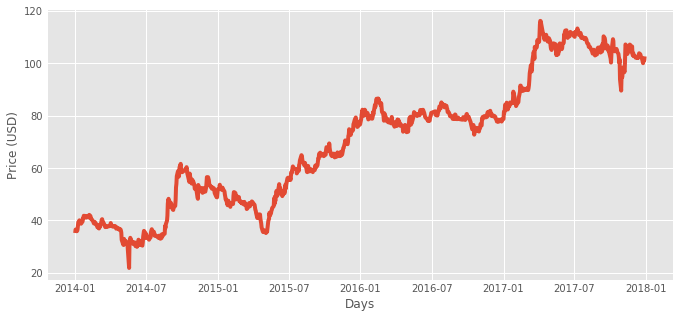

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.plot(training_set["Close"])
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.show()

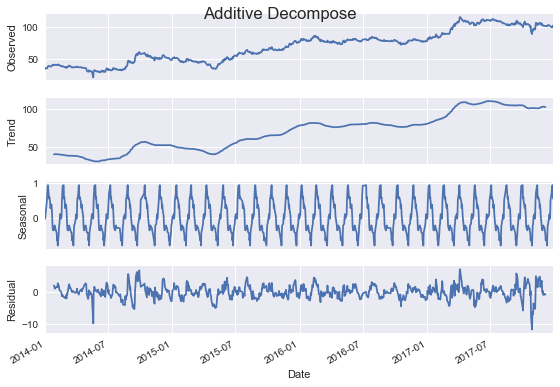

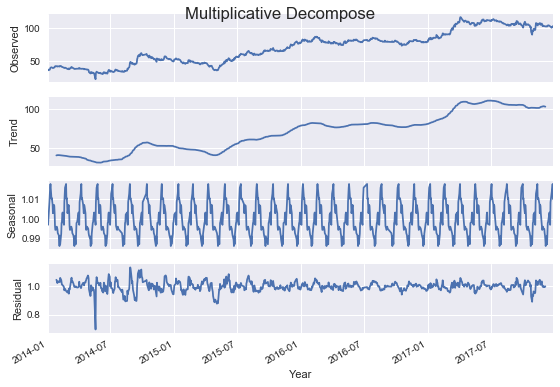

In [18]:
import statsmodels.api as sm
plt.style.use('seaborn')
decomposition = sm.tsa.seasonal_decompose(training_set["Close"], model = 'additive',freq=30)
decomposition1 = sm.tsa.seasonal_decompose(training_set["Close"], model = 'multiplicative',freq=30)
fig = decomposition.plot().suptitle('Additive Decompose')
fig = decomposition1.plot().suptitle('Multiplicative Decompose')
plt.xlabel('Year')
plt.show()

#### We can see that the dataset has a clear trend.

This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

###### Lets cheack stationarity in Agmented DK Fuller Test

### Augmented Dickey–Fuller test


For Augmented Dickey–Fuller test we have pyhton library called adfuller. We have to import this

In [15]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Augmented Dickey–Fuller test:')
dftest = adfuller(training_set['Close'], autolag='AIC')

## Lets store the values in df_potput variable

df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
print (df_output)

Results of Augmented Dickey–Fuller test:
Test Statistic                  -0.855650
p-value                          0.802227
Lags Used                        2.000000
Number of Observations Used    964.000000
dtype: float64


In [16]:
pvalue = df_output['p-value']
if pvalue < 0.05:      
    print('p-value = %.4f. The series is likely stationary.' % pvalue)
else:
    print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

p-value = 0.8022. The series is likely non-stationary.


So, at 95% C.I. according to Augmented Dickey–Fuller test we can say that our closing price is non-statiory

This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

##### lets defferencing 
d=1:  yt  =  Yt - Yt-1


In [53]:
training_set['diffPrice'] = training_set['Close'] - training_set['Close'].shift(1)
training_set=training_set.dropna(axis=0)

training_set.head(3)

,Open,High,Low,Close,diffPrice
Date,,,,,
2014-01-02,35.716067,36.752672,35.197765,36.493521,1.295756
2014-01-06,36.579905,36.666289,35.975219,35.975219,-0.518303
2014-01-07,36.407137,36.752672,35.975219,36.493521,0.518303


In [54]:

training_set=training_set.dropna(axis=0)
training_set.head(3)

,Open,High,Low,Close,diffPrice
Date,,,,,
2014-01-02,35.716067,36.752672,35.197765,36.493521,1.295756
2014-01-06,36.579905,36.666289,35.975219,35.975219,-0.518303
2014-01-07,36.407137,36.752672,35.975219,36.493521,0.518303


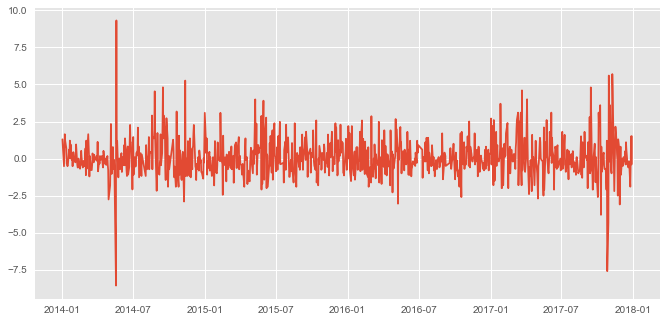

In [71]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot') ## Set ploting style
plt.plot(training_set['diffPrice'])

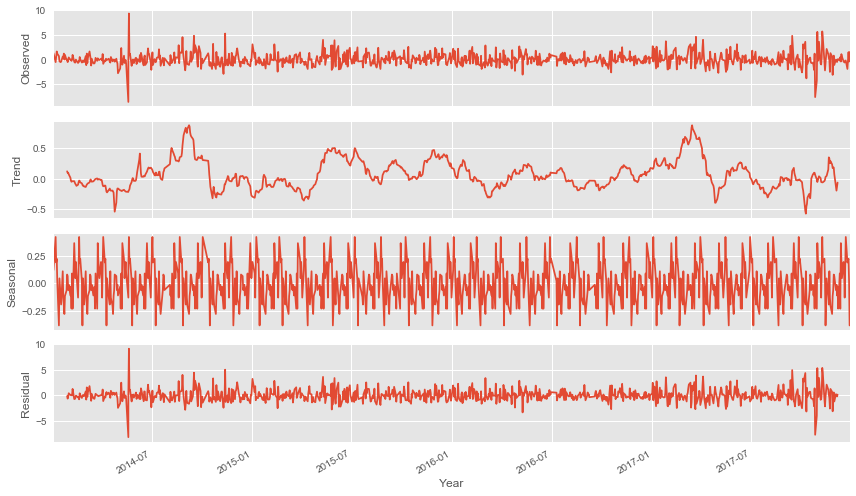

In [72]:
rcParams['figure.figsize'] =12, 7
decomposition = sm.tsa.seasonal_decompose(training_set["diffPrice"], model = 'additive',freq=30)
fig = decomposition.plot()
plt.xlabel('Year')
plt.show()

[]

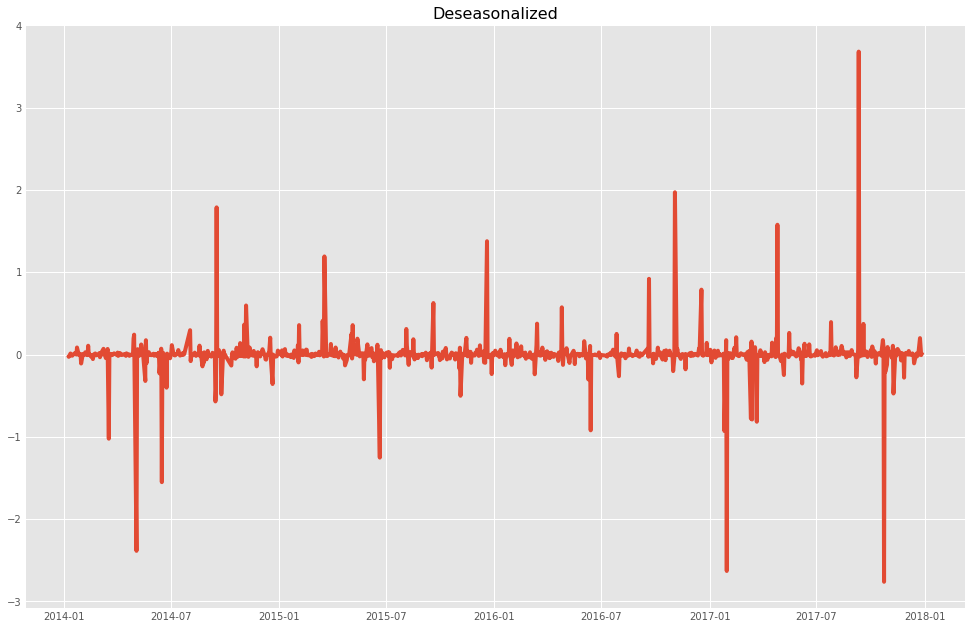

In [30]:
# Deseasonalize
deseasonalized = training_set["diffPrice"].values / decomposition.seasonal
plt.style.use('ggplot')

# Plot
plt.plot(deseasonalized)
plt.title('Deseasonalized', fontsize=16)
plt.plot()

### Lets check this differencing values by  Augmented Dickey–Fuller test

In [20]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Augmented Dickey–Fuller test:')
dftest = adfuller(training_set['diffPrice'], autolag='AIC')

## Lets store the values in df_potput variable
df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
print (df_output)

Results of Augmented Dickey–Fuller test:
Test Statistic                 -23.388575
p-value                          0.000000
Lags Used                        1.000000
Number of Observations Used    964.000000
dtype: float64


In [21]:
pvalue = df_output['p-value']
if pvalue < 0.05:      
    print('p-value = %.4f. The series is likely stationary.' % pvalue)
else:
    print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

p-value = 0.0000. The series is likely stationary.


So we found the desired value of d = 1

### Finding Suitable Value of p and q
###### p: The number of lag observations included in the model, also called the lag order.
###### q: The size of the moving average window, also called the order of moving averag

To find order of AR and MA

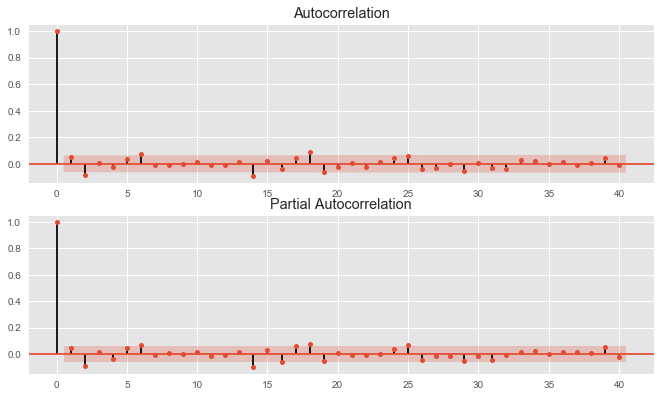

In [59]:
import statsmodels.api as sm
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(training_set['diffPrice'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(training_set['diffPrice'], lags=40, ax=ax2)

#### Paramerter Tuning

We select an ARIMA model with lower AIC value. Lets check

In [9]:
from pmdarima.arima import auto_arima
model = auto_arima(training_set['Close'], start_p=1, start_q=1,max_p=10, max_q=10,seasonal=False,d=1, trace=True)
print(model.aic())
model.summary()

Fit ARIMA: order=(1, 1, 1); AIC=3239.392, BIC=3258.885, Fit time=0.223 seconds
Fit ARIMA: order=(0, 1, 0); AIC=3243.341, BIC=3253.087, Fit time=0.006 seconds
Fit ARIMA: order=(1, 1, 0); AIC=3243.189, BIC=3257.809, Fit time=0.026 seconds
Fit ARIMA: order=(0, 1, 1); AIC=3242.725, BIC=3257.345, Fit time=0.026 seconds
Fit ARIMA: order=(2, 1, 1); AIC=3238.898, BIC=3263.264, Fit time=0.163 seconds
Fit ARIMA: order=(2, 1, 0); AIC=3237.459, BIC=3256.951, Fit time=0.049 seconds
Fit ARIMA: order=(3, 1, 1); AIC=3240.950, BIC=3270.189, Fit time=0.570 seconds
Fit ARIMA: order=(3, 1, 0); AIC=3239.315, BIC=3263.681, Fit time=0.054 seconds
Total fit time: 1.122 seconds
3237.4586631823686


#### Seasonal ARIMA

In [14]:
from pmdarima.arima import auto_arima

# Perform grid search for the ARIMA model.
stepwise_model = auto_arima(training_set['Close'], start_p=0, start_q=0, max_p=5, max_q=5, seasonal=True, d=2, D=0, 
                            trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
print(stepwise_model.summary())

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=3858.129, BIC=3867.871, Fit time=0.161 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 1); AIC=3664.481, BIC=3679.094, Fit time=0.171 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=3246.605, BIC=3261.218, Fit time=1.566 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(0, 0, 0, 1); AIC=3246.317, BIC=3265.801, Fit time=2.453 seconds
Fit ARIMA: order=(1, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=3242.538, BIC=3266.893, Fit time=2.205 seconds
Fit ARIMA: order=(2, 2, 3) seasonal_order=(0, 0, 0, 1); AIC=3230.194, BIC=3264.291, Fit time=2.908 seconds
Fit ARIMA: order=(1, 2, 3) seasonal_order=(0, 0, 0, 1); AIC=3247.223, BIC=3276.449, Fit time=1.370 seconds
Fit ARIMA: order=(3, 2, 3) seasonal_order=(0, 0, 0, 1); AIC=3232.199, BIC=3271.168, Fit time=3.151 seconds
Fit ARIMA: order=(2, 2, 2) seasonal_order=(0, 0, 0, 1); AIC=3247.264, BIC=3276.491, Fit time=1.424 seconds
Fit ARIMA: order=(2, 2, 4) seasonal_o

### So, Suitable Model will be ARIMA(2,1,0) 

## Forecasting

Now we forecast with ARIMA(0,1,0) model to our test data

Now we forecasting closing price of tommorow based on todays closing price
To do this, we used following procedure

>(1) Each time step in the test dataset is iterated.

>(2) Within each iteration, a new ARIMA model is trained on all available historical data.

>(3) The model is used to make a prediction for the next day.

>(4) The prediction is stored and the “real” observation is retrieved from the test set and added to the history for use  in the next iteration.

>(5) The performance of the model is summarized at the end by calculating the root mean squared error (RMSE) of all predictions made compared to expected values in the test dataset.



### Model Fitting and Prediction: ARIMA

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
train= training_set['Close'].values.reshape(-1, 1) #reshaping training values
test = test_set['Close'].values.reshape(-1, 1)
history = [x for x in train] 


predictions = list()
for t in range(len(test_set)):
    model = ARIMA(history, order=(2,1,0)) 
    
    model_fit = model.fit(disp=0) #Within each iteration, a new ARIMA model is trained on all available data.
    
    output = model_fit.forecast() #The model is used to make a prediction for the next day.
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    error = (yhat-obs)

    print('>predicted=%.3f, Actual=%.3f, error=%.3f' % (yhat, obs,error))
    
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

>predicted=102.735, Actual=102.750, error=-0.015
>predicted=102.699, Actual=102.750, error=-0.051
>predicted=102.805, Actual=102.050, error=0.755
>predicted=102.086, Actual=103.650, error=-1.564
>predicted=103.867, Actual=102.850, error=1.017
>predicted=102.740, Actual=101.750, error=0.990
>predicted=101.838, Actual=102.450, error=-0.612
>predicted=102.656, Actual=102.950, error=-0.294
>predicted=102.984, Actual=103.250, error=-0.266
>predicted=103.292, Actual=102.650, error=0.642
>predicted=102.665, Actual=100.250, error=2.415
>predicted=100.251, Actual=101.750, error=-1.499
>predicted=102.113, Actual=101.850, error=0.263
>predicted=101.789, Actual=101.850, error=-0.061
>predicted=101.912, Actual=105.750, error=-3.838
>predicted=106.014, Actual=105.750, error=0.264
>predicted=105.471, Actual=108.850, error=-3.379
>predicted=109.074, Actual=109.150, error=-0.076
>predicted=108.985, Actual=107.950, error=1.035
>predicted=107.944, Actual=106.450, error=1.494
>predicted=106.554, Actual=10

In [19]:
test_set['Predicted']=np.round(predictions,1)

In [20]:
test_set['Predicted']=np.round(predictions,1)
test_set['Error']=test_set['Close']-test_set['Predicted']

### Plotting Actual vs Predicted

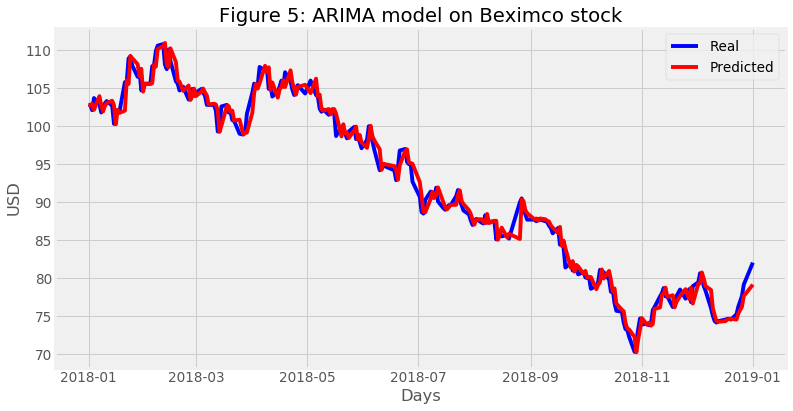

Test RMSE: 1.254


In [21]:
plt.figure(figsize=(12, 6), dpi=70)
plt.style.use('fivethirtyeight')
plt.plot(test_set['Close'], color='blue',label='Real')
plt.plot(test_set["Predicted"], color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on Beximco stock')
plt.legend()
plt.show()
print('Test RMSE: %.3f' % rmse)

### We found our Root Mean Square Error as 1.252

In [22]:
test_set.head(20)

,Close,Predicted,Error
Date,,,
2018-01-01,102.75,102.8,-0.05
2018-01-02,102.75,102.7,0.05
2018-01-03,102.05,102.9,-0.85
2018-01-04,103.65,102.1,1.55
2018-01-07,102.85,103.9,-1.05
2018-01-08,101.75,102.7,-0.95
2018-01-09,102.45,101.9,0.55
2018-01-10,102.95,102.6,0.35
2018-01-11,103.25,103.0,0.25


### Model Fitting and Prediction: SARIMA

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
train= training_set['Close'].values.reshape(-1, 1) #reshaping training values
test = test_set['Close'].values.reshape(-1, 1)
history = [x for x in train] 


predictions = list()
for t in range(len(test_set)):
    model = SARIMAX(history, order=(2,2,3))
    
    model_fit = model.fit(disp=0) #Within each iteration, a new ARIMA model is trained on all available data.
    
    output = model_fit.forecast() #The model is used to make a prediction for the next day.
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    error = (yhat-obs)

    print('>predicted=%.3f, Actual=%.3f, error=%.3f' % (yhat, obs,error))
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

>predicted=103.066, Actual=102.750, error=0.316
>predicted=102.473, Actual=102.750, error=-0.277
>predicted=102.983, Actual=102.050, error=0.933
>predicted=102.113, Actual=103.650, error=-1.537
>predicted=103.633, Actual=102.850, error=0.783
>predicted=103.076, Actual=101.750, error=1.326
>predicted=101.525, Actual=102.450, error=-0.925
>predicted=102.855, Actual=102.950, error=-0.095
>predicted=102.785, Actual=103.250, error=-0.465
>predicted=103.426, Actual=102.650, error=0.776
>predicted=102.726, Actual=100.250, error=2.476
>predicted=100.025, Actual=101.750, error=-1.725
>predicted=102.291, Actual=101.850, error=0.441
>predicted=101.456, Actual=101.850, error=-0.394
>predicted=102.246, Actual=105.750, error=-3.504
>predicted=105.925, Actual=105.750, error=0.175
>predicted=105.498, Actual=108.850, error=-3.352
>predicted=109.459, Actual=109.150, error=0.309
>predicted=108.685, Actual=107.950, error=0.735
>predicted=108.389, Actual=106.450, error=1.939
>predicted=106.289, Actual=107.

/Users/san/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=104.987, Actual=104.050, error=0.937
>predicted=103.962, Actual=104.950, error=-0.988


/Users/san/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=105.128, Actual=105.350, error=-0.222
>predicted=105.415, Actual=104.250, error=1.165
>predicted=104.162, Actual=105.950, error=-1.788
>predicted=106.328, Actual=104.050, error=2.278
>predicted=103.682, Actual=103.850, error=-0.168
>predicted=104.262, Actual=102.250, error=2.012
>predicted=102.052, Actual=101.850, error=0.202
>predicted=101.961, Actual=102.150, error=-0.189
>predicted=102.368, Actual=101.450, error=0.918
>predicted=101.177, Actual=102.050, error=-0.873
>predicted=102.525, Actual=102.150, error=0.375
>predicted=101.857, Actual=101.550, error=0.307
>predicted=101.786, Actual=98.650, error=3.136
>predicted=98.615, Actual=99.850, error=-1.235
>predicted=99.893, Actual=99.150, error=0.743
>predicted=99.302, Actual=98.950, error=0.352
>predicted=98.850, Actual=98.350, error=0.500
>predicted=98.547, Actual=99.250, error=-0.703
>predicted=99.250, Actual=99.850, error=-0.600
>predicted=99.918, Actual=98.250, error=1.668
>predicted=98.295, Actual=98.550, error=-0.255


/Users/san/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=72.836, Actual=72.250, error=0.586


/Users/san/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=72.499, Actual=70.250, error=2.249


/Users/san/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>predicted=69.979, Actual=71.650, error=-1.671
>predicted=71.774, Actual=73.250, error=-1.476
>predicted=73.377, Actual=74.650, error=-1.273
>predicted=74.504, Actual=73.850, error=0.654
>predicted=74.076, Actual=73.950, error=0.126
>predicted=73.814, Actual=73.750, error=0.064
>predicted=73.866, Actual=73.850, error=0.016
>predicted=73.898, Actual=75.750, error=-1.852
>predicted=75.742, Actual=76.150, error=-0.408
>predicted=76.287, Actual=77.550, error=-1.263
>predicted=77.510, Actual=77.950, error=-0.440
>predicted=78.053, Actual=78.650, error=-0.597
>predicted=78.678, Actual=77.550, error=1.128
>predicted=77.504, Actual=77.550, error=-0.046
>predicted=77.697, Actual=76.150, error=1.547
>predicted=76.019, Actual=76.650, error=-0.631
>predicted=76.835, Actual=77.550, error=-0.715
>predicted=77.534, Actual=78.450, error=-0.916
>predicted=78.477, Actual=77.250, error=1.227
>predicted=77.320, Actual=78.500, error=-1.180
>predicted=78.499, Actual=76.800, error=1.699
>predicted=76.824, Ac

In [60]:
test_set['Predicted']=np.round(predictions,1)
test_set['Error']=test_set['Close']-test_set['Predicted']

In [61]:
test_set

,Close,Predicted,Error
Date,,,
2018-01-01,102.75,103.1,-0.35
2018-01-02,102.75,102.5,0.25
2018-01-03,102.05,103.0,-0.95
2018-01-04,103.65,102.1,1.55
2018-01-07,102.85,103.6,-0.75
2018-01-08,101.75,103.1,-1.35
2018-01-09,102.45,101.5,0.95
2018-01-10,102.95,102.9,0.05
2018-01-11,103.25,102.8,0.45


In [75]:
test_set.to_csv('/Users/san/predict_ARIMA.csv')

## Supoort Vector Regression

In [10]:
dataset = dataset['2014':'2019'].iloc[:,3:4]
dataset.head(10)

,Close
Date,
2014-01-01,35.197765
2014-01-02,36.493521
2014-01-06,35.975219
2014-01-07,36.493521
2014-01-08,38.134813
2014-01-09,39.344185
2014-01-12,40.035255
2014-01-13,39.689720
2014-01-15,39.171418


In [12]:
dataset['lag1'] = dataset['Close'].shift(-1)
dataset.head(10)

,Close,lag1,lag2,lag3
Date,,,,
2014-01-01,35.197765,36.493521,35.975219,36.493521
2014-01-02,36.493521,35.975219,36.493521,38.134813
2014-01-06,35.975219,36.493521,38.134813,39.344185
2014-01-07,36.493521,38.134813,39.344185,40.035255
2014-01-08,38.134813,39.344185,40.035255,39.689720
2014-01-09,39.344185,40.035255,39.689720,39.171418
2014-01-12,40.035255,39.689720,39.171418,38.739499
2014-01-13,39.689720,39.171418,38.739499,39.344185
2014-01-15,39.171418,38.739499,39.344185,39.603337


In [13]:
dataset = dataset.dropna(how = 'any')

In [14]:
training_set = dataset['2014':'2017'].iloc[:,0:2] #2014-2017 is our training data
training_set.head(5)

,Close,lag1
Date,,
2014-01-01,35.197765,36.493521
2014-01-02,36.493521,35.975219
2014-01-06,35.975219,36.493521
2014-01-07,36.493521,38.134813
2014-01-08,38.134813,39.344185


In [15]:

test_set = dataset['2018':].iloc[:,0:2] #2018 is our test data ( target  variable is Closing Price)
test_set.head(5)

,Close,lag1
Date,,
2018-01-01,102.75,102.75
2018-01-02,102.75,102.05
2018-01-03,102.05,103.65
2018-01-04,103.65,102.85
2018-01-07,102.85,101.75


In [16]:
X_train = training_set.drop('lag1', axis=1)
y_train = training_set['lag1']

X_test = test_set.drop('lag1', axis = 1)
y_test = test_set['lag1']

## Plotting

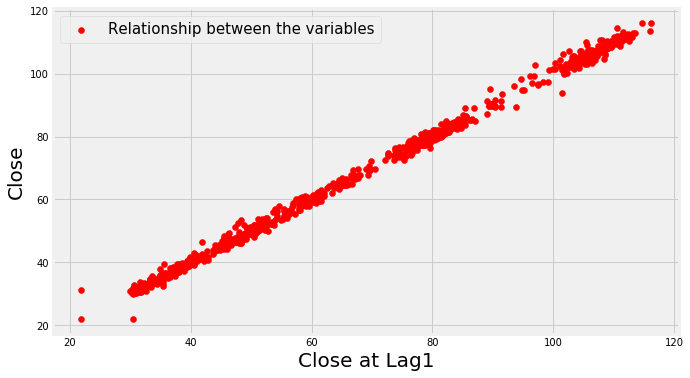

In [29]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(X_train, y_train, c='r')
# dots.set_label('dots')
# line.set_label('line')
plt.xlabel('Close at Lag1', fontsize=20)
plt.ylabel('Close', fontsize=20)
plt.legend(['Relationship between the variables'], fontsize=15)
plt.show()

## Parameter Tuning

In [29]:
from sklearn.svm import SVR
test_rmse_val = []        #to store rmse values for different c
train_rmse = []
C = [0.001, 0.005, 0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9,1,1.5,1.6,1.8,1.9,2]
e = [0.1,0.01,0.001]
i=0
for C in C:
    for i in range(3):
        model = SVR(C=C,kernel='linear',epsilon=e[i])
        model.fit(X_train,y_train)
        predtest = model.predict(X_test)
        #make prediction on test set
        errortest = np.sqrt(mean_squared_error(y_test,predtest)) #calculate rmse
        predt = model.predict(X_train)
        errortr = np.sqrt(mean_squared_error(y_train, predt))
        test_rmse_val.append(errortest) #store rmse values
        train_rmse.append(errortr)
        print('value for C= ' , C , 'value of epsilon=',e[i],'Train RMSE:', errortr,'Test RMSE:',errortest)
        i=i+1

value for C=  0.001 value of epsilon= 0.1 Train RMSE: 1.3002857734702287 Test RMSE: 1.2241011250071765
value for C=  0.001 value of epsilon= 0.01 Train RMSE: 1.3000572377577717 Test RMSE: 1.2238923746431405
value for C=  0.001 value of epsilon= 0.001 Train RMSE: 1.300725084705279 Test RMSE: 1.2240700190680245
value for C=  0.005 value of epsilon= 0.1 Train RMSE: 1.2981435083231607 Test RMSE: 1.2241330414895184
value for C=  0.005 value of epsilon= 0.01 Train RMSE: 1.2986426668215032 Test RMSE: 1.224115703071538
value for C=  0.005 value of epsilon= 0.001 Train RMSE: 1.2980987476704802 Test RMSE: 1.2242648512160512
value for C=  0.1 value of epsilon= 0.1 Train RMSE: 1.2984565798907077 Test RMSE: 1.2241620331667318
value for C=  0.1 value of epsilon= 0.01 Train RMSE: 1.29823926040022 Test RMSE: 1.2243214085012482
value for C=  0.1 value of epsilon= 0.001 Train RMSE: 1.2981656582849743 Test RMSE: 1.2242885230023044
value for C=  0.2 value of epsilon= 0.1 Train RMSE: 1.2987180751943685 Tes

### Plotting a range of $\epsilon$ Values

In [126]:
def test_LinearSVR_epsilon(X_train,X_test,y_train,y_test):
    '''
    test the performance with different epsilon
    :param data:  train_data,test_data, train_target, test_target
    :Copyright Shawon Sikder,BSMRSTU
    '''
    print("Please wait, It may takes some time")
    X_train,X_test,y_train,y_test
    epsilons=np.logspace(-2,2)
    train_scores=[]
    test_scores=[]
    for  epsilon in  epsilons:
        regr=SVR(epsilon=epsilon,kernel='linear')
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train, y_train))
        test_scores.append(regr.score(X_test, y_test))
        print("Iteration--> ",len(train_scores))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(epsilons,train_scores,label="Training $R^2$ ",marker='+' )
    ax.plot(epsilons,test_scores,label= " Testing  $R^2$ ",marker='o' )
    ax.set_title( "$\epsilon$ Vs Train(in-sample) and Test(out-sample) $R^2$ ")
    ax.set_xscale("log")
    ax.set_xlabel("$\epsilon$")
    ax.set_ylabel("$R^2$")
    ax.set_ylim(-1,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()

Please wait, It may takes some time
Iteration-->  1
Iteration-->  2
Iteration-->  3
Iteration-->  4
Iteration-->  5
Iteration-->  6
Iteration-->  7
Iteration-->  8
Iteration-->  9
Iteration-->  10
Iteration-->  11
Iteration-->  12
Iteration-->  13
Iteration-->  14
Iteration-->  15
Iteration-->  16
Iteration-->  17
Iteration-->  18
Iteration-->  19
Iteration-->  20
Iteration-->  21
Iteration-->  22
Iteration-->  23
Iteration-->  24
Iteration-->  25
Iteration-->  26
Iteration-->  27
Iteration-->  28
Iteration-->  29
Iteration-->  30
Iteration-->  31
Iteration-->  32
Iteration-->  33
Iteration-->  34
Iteration-->  35
Iteration-->  36
Iteration-->  37
Iteration-->  38
Iteration-->  39
Iteration-->  40
Iteration-->  41
Iteration-->  42
Iteration-->  43
Iteration-->  44
Iteration-->  45
Iteration-->  46
Iteration-->  47
Iteration-->  48
Iteration-->  49
Iteration-->  50


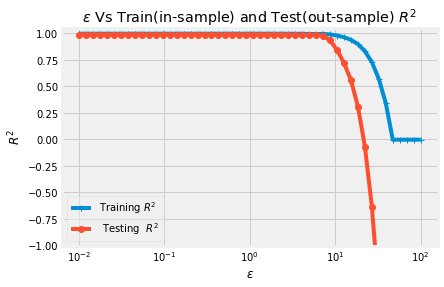

In [127]:
test_LinearSVR_epsilon(X_train,X_test,y_train,y_test)

### Plotting a range of C Values

In [130]:
def test_LinearSVR_C(X_train,X_test,y_train,y_test):
    '''
    test the performance with different epsilon
    :param data:  train_data,test_data, train_target, test_target
    :Copyright Shawon Sikder,BSMRSTU
    '''
    print("Please wait, It may takes some time")
    X_train,X_test,y_train,y_test
    Cval=np.logspace(-1,1)
    train_scores=[]
    test_scores=[]
    for  Cval in  Cval:
        regr=SVR(C=Cval,epsilon=1,kernel='linear')
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train, y_train))
        test_scores.append(regr.score(X_test, y_test))
        print("Iteration--> ",len(train_scores))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(epsilons,train_scores,label="Training $R^2$ ",marker='+' )
    ax.plot(epsilons,test_scores,label= " Testing  $R^2$ ",marker='o' )
    ax.set_title( "C Vs Train(in-sample) and Test(out-sample) $R^2$ ")
    ax.set_xscale("linear")
    ax.set_xlabel("C")
    ax.set_ylabel("$R^2$")
    ax.set_ylim(-1,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()

Please wait, It may takes some time
Iteration-->  1
Iteration-->  2
Iteration-->  3
Iteration-->  4
Iteration-->  5
Iteration-->  6
Iteration-->  7
Iteration-->  8
Iteration-->  9
Iteration-->  10
Iteration-->  11
Iteration-->  12
Iteration-->  13
Iteration-->  14
Iteration-->  15
Iteration-->  16
Iteration-->  17
Iteration-->  18
Iteration-->  19
Iteration-->  20
Iteration-->  21
Iteration-->  22
Iteration-->  23
Iteration-->  24
Iteration-->  25
Iteration-->  26
Iteration-->  27
Iteration-->  28
Iteration-->  29
Iteration-->  30
Iteration-->  31
Iteration-->  32
Iteration-->  33
Iteration-->  34
Iteration-->  35
Iteration-->  36
Iteration-->  37
Iteration-->  38
Iteration-->  39
Iteration-->  40
Iteration-->  41
Iteration-->  42
Iteration-->  43
Iteration-->  44
Iteration-->  45
Iteration-->  46
Iteration-->  47
Iteration-->  48
Iteration-->  49
Iteration-->  50


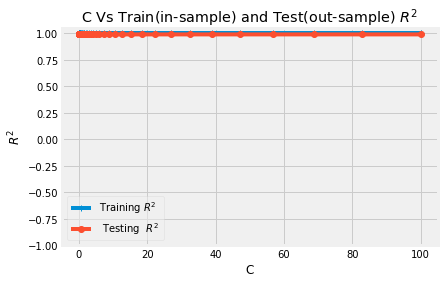

In [131]:
test_LinearSVR_C(X_train,X_test,y_train,y_test)

## Model Fitting

In [19]:
from sklearn.svm import SVR


In [20]:
model = SVR(C=0.01,kernel='linear',epsilon=0.1)
model.fit(X_train,y_train)
pred = model.predict(X_test)

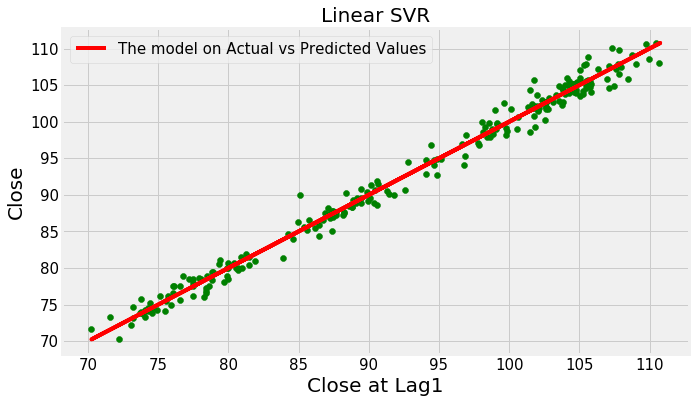

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(pred, y_test, c='g', label= 'Actual vs Predicted data')
# dots.set_label('dots')
plt.plot(y_test, y_test, color= 'red', label= 'Linear model')
# line.set_label('line')
plt.title('Linear SVR', fontsize=20)
plt.xlabel('Close at Lag1', fontsize=20)
plt.ylabel('Close', fontsize=20)
plt.tick_params(labelsize=15)
plt.legend(['The model on Actual vs Predicted Values'], fontsize=15)
plt.show()

In [21]:
se=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred)),2)))
se

1.2241388852274253

In [70]:
y_test = y_test.to_frame() 

y_test["pred"]=np.round(pred,1)

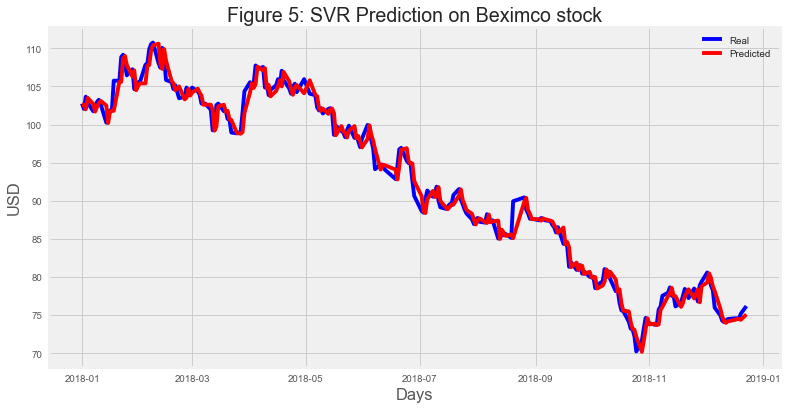

In [75]:
plt.figure(figsize=(12, 6), dpi=70)
plt.style.use('fivethirtyeight')

plt.plot(y_test["lag1"],color='blue', label='Real')
plt.plot(y_test["pred"], color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: SVR Prediction on Beximco stock')
plt.legend()
plt.show()

# KNN

In [81]:
X_train = training_set.drop('lag1', axis=1)
y_train = training_set['lag1']

X_test = test_set.drop('lag1', axis = 1)
y_test = test_set['lag1']

In [93]:
from sklearn import neighbors
rmse_val = []        #to store rmse values for different k
for K in range(120):
    K = K+1
    model = neighbors.KNeighborsRegressor(algorithm='kd_tree',n_neighbors = K,metric='euclidean')

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.2358586144475456
RMSE value for k=  2 is: 1.733712600426695
RMSE value for k=  3 is: 1.5541812424532628
RMSE value for k=  4 is: 1.5159562671412057
RMSE value for k=  5 is: 1.4427417180456046
RMSE value for k=  6 is: 1.4092241912956947
RMSE value for k=  7 is: 1.403084647973735
RMSE value for k=  8 is: 1.4078364562904773
RMSE value for k=  9 is: 1.404157477104152
RMSE value for k=  10 is: 1.4087578958075417
RMSE value for k=  11 is: 1.40085307727676
RMSE value for k=  12 is: 1.4128668633970272
RMSE value for k=  13 is: 1.3887999601846435
RMSE value for k=  14 is: 1.367979074989912
RMSE value for k=  15 is: 1.3513371489579036
RMSE value for k=  16 is: 1.3737680011463702
RMSE value for k=  17 is: 1.378610224168153
RMSE value for k=  18 is: 1.3683942713842965
RMSE value for k=  19 is: 1.370516447754903
RMSE value for k=  20 is: 1.3735518107683196
RMSE value for k=  21 is: 1.3746284652707736
RMSE value for k=  22 is: 1.382045377939978
RMSE value for k=  23 is: 1.

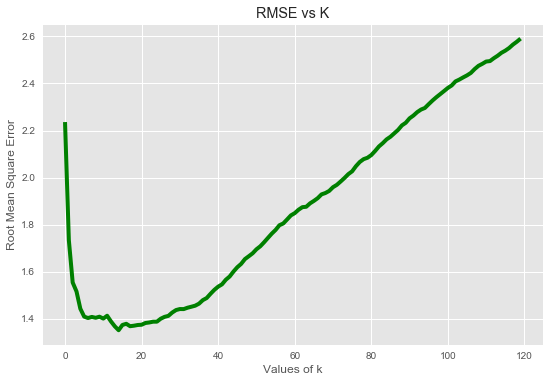

In [94]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) 

plt.style.use('ggplot')
plt.plot(curve,color='g')
plt.ylabel('Root Mean Square Error')
plt.xlabel('Values of k')
plt.title('RMSE vs K')
plt.show()

In [95]:
min(rmse_val)

1.3513371489579036

In [96]:
from sklearn.neighbors import KNeighborsRegressor
# Fit model using in built sklearn function
model=KNeighborsRegressor(n_neighbors=15,metric='euclidean')
model.fit(X_train,y_train)
predsk = model.predict(X_test)
se=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predsk)),2)))
se

1.3513371489579036

In [97]:
y_test = y_test.to_frame() 

y_test["pred"]=np.round(predsk,1)

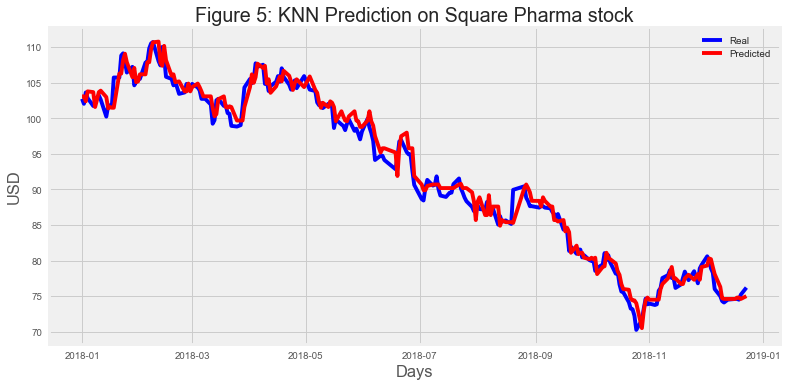

In [103]:
plt.figure(figsize=(12, 6), dpi=70)
plt.style.use('fivethirtyeight')

plt.plot(y_test["lag1"],color='blue', label='Real')
plt.plot(y_test["pred"], color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: KNN Prediction on Square Pharma stock')
plt.legend()
plt.show()